## Create a virtual environment before starting

## Using Conda
```bash
conda create -n rse_torch python=3.11 -y
conda activate rse_torch
conda install numpy matplotlib ipykernel pytorch torchvision torchaudio -c pytorch -c conda-forge -y
python -m ipykernel install --user --name rse_torch --display-name "Python rse_torch"
````

## Using python venv on macOS or Linux

```bash
mkdir -p rse_notebook_demo
cd rse_notebook_demo

python3 -m venv .venv
source .venv/bin/activate

python -m pip install -U pip
python -m pip install numpy matplotlib ipykernel torch torchvision torchaudio
python -m ipykernel install --user --name rse_venv --display-name "Python rse_venv"
```

## Using python venv on Windows PowerShell

```powershell
mkdir rse_notebook_demo
cd rse_notebook_demo

py -m venv .venv
.\.venv\Scripts\Activate.ps1

python -m pip install -U pip
python -m pip install numpy matplotlib ipykernel torch torchvision torchaudio
python -m ipykernel install --user --name rse_venv --display-name "Python rse_venv"
```


### In Jupyter

If you want the environment to appear as a kernel

```bash
python -m pip install ipykernel
python -m ipykernel install --user --name rse-demo --display-name "Python rse-demo"
```

## Jupyter Notebook useful shortcuts

### Running cells
- **Shift + Enter**  
  Run the current cell and move to the next cell

- **Ctrl + Enter**  
  Run the current cell and stay in the same cell

- **Alt + Enter**  
  Run the current cell and insert a new cell below

---

### Command mode vs Edit mode
- **Esc**  
  Enter command mode 

- **Enter**  
  Enter edit mode

Command mode is for operating on cells.  
Edit mode is for writing code or text.

---

### Cell management
- **A**  
  Insert a new cell above

- **B**  
  Insert a new cell below

- **D, D**  
  Delete the selected cell

- **Z**  
  Undo cell deletion

- **C**  
  Copy cell

- **X**  
  Cut cell

- **V**  
  Paste cell below

- **Shift + V**  
  Paste cell above

---

### Cell type
- **M**  
  Convert cell to Markdown

- **Y**  
  Convert cell to Code

- **R**  
  Convert cell to Raw

---

### Navigation
- **Arrow keys**  
  Move between cells in command mode

- **J / K**  
  Move down or up between cells in command mode

---

### Kernel control
- **I, I**  
  Interrupt the kernel

- **0, 0**  
  Restart the kernel

---

### Help and productivity
- **Shift + Tab**  
  Show function signature and docstring

- **Tab**  
  Autocomplete variable and function names


In [4]:
## 7 NumPy example
import numpy as np

rng = np.random.default_rng(0)

A = rng.normal(size=(4, 3))
B = rng.normal(size=(3, 2))

C = A @ B
print("A shape", A.shape)
print("B shape", B.shape)
print("C shape", C.shape)

col_means = C.mean(axis=0)
col_stds = C.std(axis=0, ddof=1)

print("means", col_means)
print("stds", col_stds)



A shape (4, 3)
B shape (3, 2)
C shape (4, 2)
means [-0.0955502   0.02138937]
stds [3.08563003 0.62490073]


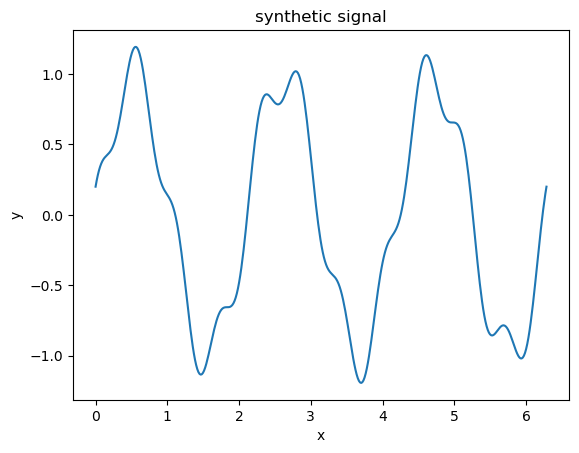

In [5]:
# Plot a quick NumPy generated signal
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(3 * x) + 0.2 * np.cos(11 * x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("synthetic signal")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [8]:
#PyTorch code example
import torch
from torch import nn

# CPU only
device = "cpu"
torch.manual_seed(0)

# Fake regression data: y = 3x + 2 + noise
x = torch.linspace(-1, 1, 200).unsqueeze(1).to(device)          # shape (200, 1)
y = (3 * x + 2 + 0.1 * torch.randn_like(x)).to(device)          # shape (200, 1)

# Simple linear model
model = nn.Linear(1, 1).to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

for step in range(200):
    opt.zero_grad()
    pred = model(x)
    loss = loss_fn(pred, y)
    loss.backward()
    opt.step()

    if step % 50 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print("step", step, "loss", float(loss), "w", w, "b", b)

print("final w", model.weight.item(), "final b", model.bias.item())


step 0 loss 11.14459228515625 w -0.5286034345626831 b -0.019757449626922607
step 50 loss 0.013707740232348442 w 2.876354455947876 b 1.9977092742919922
step 100 loss 0.009229527786374092 w 2.9806718826293945 b 1.9977378845214844
step 150 loss 0.009225324727594852 w 2.983867645263672 b 1.9977378845214844
final w 2.9839651584625244 final b 1.9977378845214844


## Markdown text inside a notebook

This is **bold** and this is *italic*.

A numbered list

1. Create environment
2. Install dependencies
3. Run notebook
4. Export results

A bullet list

* Reproducibility matters
* Restart kernel and run all should work
* Keep notebooks readable

## LaTeX math inside a notebook

Inline math example: $\nabla_\theta L(\theta)$

Display math example

$$ L(\theta) = \frac{1}{N}\sum_{i=1}^{N}\left(\hat{y}_i - y_i\right)^2 $$

A common update rule

$$\theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta_t)$$

## Running terminal commands inside a notebook using !

You can run shell commands by prefixing with `!`

List files

```python
!ls
```

Show current directory

```python
!pwd
```

Install a package into the current environment

```python
!python -m pip install -U numpy
```

Capture command output into a Python variable

```python
files = !ls
files[:5]
```



## Visual Studio Code and Remote SSH workflow

### Install the basics on your laptop

* Visual Studio Code
* Remote SSH extension
* Python extension

### Add an SSH host entry

Edit your SSH config file

macOS or Linux

```bash
code ~/.ssh/config
```

Example config entry

```text
Host hpc
  HostName login.yourcluster.edu
  User yourusername
  IdentityFile ~/.ssh/id_ed25519
```

### Connect from VS Code

1. Open Command Palette
2. Remote SSH Connect to Host
3. Pick `hpc`

### Remote Jupyter usage

Once connected to the remote host in VS Code

1. Open a notebook on the remote filesystem
2. Select the interpreter from the remote environment `.venv`
3. Run cells on the remote kernel

### Optional forward a remote Jupyter server

On the remote host

```bash
jupyter lab --no-browser --port 8888
```

On your laptop in a terminal

```bash
ssh -N -L 8888:localhost:8888 hpc
```

Then open in a browser
`http://localhost:8888`


Darwin Visual Studio Code: https://docs.hpc.udel.edu/software/vscode/darwin
Darwin Jupyter notebook: https://docs.hpc.udel.edu/technical/recipes/jupyter-notebook